# Integration
Just like root-finding, there are several ways to carry out integration. First, we need to specify the problem and let's narrow it down to the case of integrating a list of values. These could be from data or from an analytic expression (we'll show how each approach looks).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def int_simple(f,dx):
    """
    Simplest integration possible , using uniform rectangular slices. Gives a rather poor result , 
    with error on the order of dx. f[] should be a list of function values at x values separated
    by the interval dx. The limits of integration are x[0] -> x[0]+dx*len(f).
    Note that this algorithm does not use the last point in f.
    """
    return dx*sum(f[0:-1])

In [3]:
N = 100  # Number of integration points
a = 0.0  # Starting point
b = pi   # Ending point

# Use an optional arg to linspace to get the interval it generates:
# Compare all this to the messy list comprehensions in the book.
x,interval = linspace(a,b,N,retstep=True)

# Using arrays also makes this line much cleaner:
FunctionValues = sin(x)

print("The value of the integral is approximately"),
print(int_simple(FunctionValues, interval))

The value of the integral is approximately
1.99983216389


## Built in methods:
### Trapezoid method:
Fit the function to a series of trapezoids that connect the points where the function intersects each slice. <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Trapezoidal_rule_illustration.png/220px-Trapezoidal_rule_illustration.png">

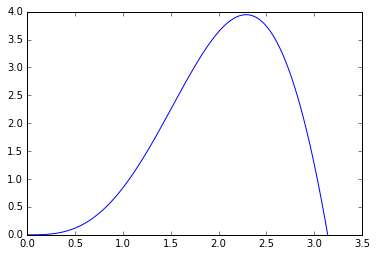

In [4]:
N = 100  # Number of integration points
a = 0.0  # Starting point
b = pi   # Ending point
x,interval = linspace(a,b,N,retstep=True)

y = x*x*sin(x)

plot(x,y)

In [5]:
# Integrate using the trapezoidal rule
trapz(y,x)

5.8687761800062619

### Simpson method:
Well described in the book, fits each slice to a parabola, requires an even number of slices (odd number of points) so if that is not the case, an additional slice has to be included. The book gives the formula for the extra area and there are a variety of ways the builtin functions handle this. <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Simpsons_method_illustration.png/220px-Simpsons_method_illustration.png">

In [6]:
from scipy.integrate import simps

In [7]:
# Integrate using Simpson's rule
simps(y,x)

5.8695877050822904

Note, this didn't complain about having an even number of samples (odd number of slices) since the method handles it "automatically". We do have some control over how it handles the slice count. To see the difference, it helps to use fewer slices (so the effect is larger):

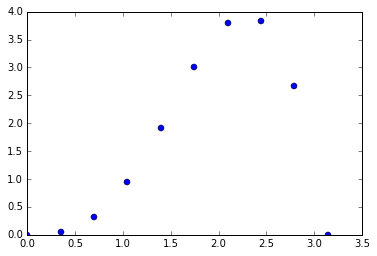

In [8]:
N = 10  # Number of integration points
a = 0.0  # Starting point
b = pi   # Ending point
x,interval = linspace(a,b,N,retstep=True)

y = x*x*sin(x)

plot(x,y,"o")

In [9]:
print(simps(y,x,even="first")) # Use Simpson's rule for the first N-2; trapezoidal rule on the last interval.
print(simps(y,x,even="last"))  # Use Simpson's rule for the last N-2; trapezoidal rule on the first interval.
print(simps(y,x))  # Default averages the two results above

5.82335790888
5.8731047779
5.84823134339


As the grid gets finer (i.e. larger N) this difference, and the overall error, gets smaller. How does the total accuracy of numerical integration improve with N?

### Accuracy vs N (simps)

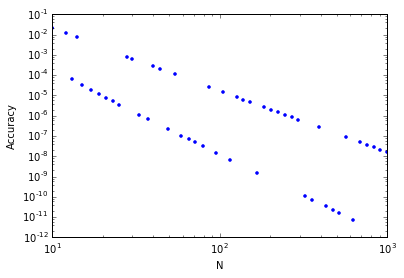

In [10]:
a = 0.0  # Starting point
b = pi   # Ending point

accuracy = []
Nvals = [int(N) for N in logspace(1,3)]
for N in Nvals:
    x,interval = linspace(a,b,N,retstep=True)
    y = x*x*sin(x)
    #print(N)
    delta = simps(y,x) - 5.86960440108936
    #print(delta)
    accuracy.append(abs(delta))
    
loglog(Nvals,accuracy,".")
xlabel("N")
ylabel("Accuracy")

So the accuracy in the numerical integration of simps improves about four orders per order increase in N. The graph is bifurcated because some N values are even and some are odd. The better accuracy (lower trace) occurs for which N?

### Accuracy vs N (trapz)

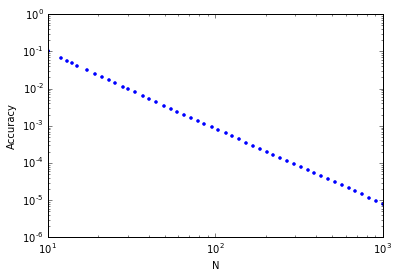

In [11]:
# Same analysis for trapz
a = 0.0  # Starting point
b = pi   # Ending point

accuracy = []
Nvals = [int(N) for N in logspace(1,3)]
for N in Nvals:
    x,interval = linspace(a,b,N,retstep=True)
    y = x*x*sin(x)
    #print(N)
    delta = trapz(y,x) - 5.86960440108936
    #print(delta)
    accuracy.append(abs(delta))
    
loglog(Nvals,accuracy,".")
xlabel("N")
ylabel("Accuracy")

So the accuracy in the numerical integration of trapz only improves about two orders per order increase in N. Also, the accuracy does not depend on the parity of N.

As an aside, notice that the help windows lists the file where this function is defined. That means you can go in and read the underlying code and see how it is implemented. While this is a more advanced use, it is important to realize how valuable this is. If you use MATLAB or Maple, you don't have the option of studying the code-level implementation of the functions you use.

In [12]:
trapz?

### Time trials:
Using the `%%timeit` magic we can find the execution time of a full cell. Using this, we see that the added accuracy comes at a (small) price in runtime.

In [13]:
# Go back to larger number of points to compare runtime:
N = 100  # Number of integration points
a = 0.0  # Starting point
b = pi   # Ending point
x,interval = linspace(a,b,N,retstep=True)
y = x*x*sin(x)

In [14]:
%%timeit
simps(y,x)

10000 loops, best of 3: 117 µs per loop


In [15]:
%%timeit
trapz(y,x)

10000 loops, best of 3: 19.9 µs per loop
